In [3]:
##### Task 1

import quandl

In [4]:
import pandas as pd
import quandl as q


# set the API key
q.ApiConfig.api_key = "wQrod-5shisTzX7fg2ib"

#send a get request to query Tesla's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019
tesla_data = q.get("WIKI/TSLA", start_date="2010-01-01", end_date="2018-01-01")

# check the first 5 rows of the dataframe
tesla_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [285]:
tesla_data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-22,329.51,330.9214,324.82,325.20,4186131.0,0.0,1.0,329.51,330.9214,324.82,325.20,4186131.0
2017-12-26,323.83,323.9400,316.58,317.29,4321909.0,0.0,1.0,323.83,323.9400,316.58,317.29,4321909.0
2017-12-27,316.00,317.6800,310.75,311.64,4645441.0,0.0,1.0,316.00,317.6800,310.75,311.64,4645441.0
2017-12-28,311.75,315.8200,309.54,315.36,4294689.0,0.0,1.0,311.75,315.8200,309.54,315.36,4294689.0
2017-12-29,316.18,316.4100,310.00,311.35,3727621.0,0.0,1.0,316.18,316.4100,310.00,311.35,3727621.0


In [12]:
##### Task 2


tesla_data = q.get("WIKI/TSLA", start_date="2010-01-01", end_date="2018-01-01")
pd.options.mode.chained_assignment = None

def SMA(n):
    tesla_close = tesla_data[["Close"]]
    tesla_close.rename(columns={"Close": "SMA{}".format(n)},inplace = True)
    return tesla_close.rolling(n).mean()

SMA(25)


,SMA25
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
...,...
2017-12-22,320.8672
2017-12-26,320.9568
2017-12-27,321.0728


In [20]:
##### Task 3


tesla_data = q.get("WIKI/TSLA", start_date="2010-01-01", end_date="2018-01-01")
pd.options.mode.chained_assignment = None

def SMA_std(n):
    tesla_close = tesla_data[["Close"]]
    tesla_close.rename(columns={"Close": "STD{}".format(n)},inplace = True)
    return tesla_close.rolling(n).std()

SMA_std(25)

,STD25
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
...,...
2017-12-22,12.576965
2017-12-26,12.541725
2017-12-27,12.436996


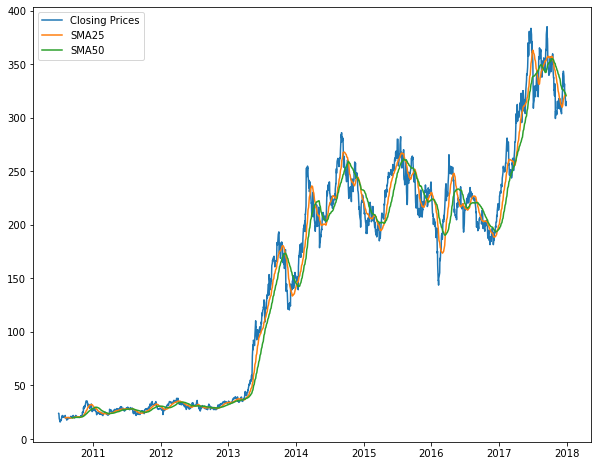

In [268]:
##### Graphs


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
SMA25 = SMA(25)
SMA50 = SMA(50)


plt.plot(tesla_data[["Close"]])
plt.plot(SMA25)
plt.plot(SMA50)
plt.legend(["Closing Prices","SMA25","SMA50"])




<Figure size 800x640 with 0 Axes>

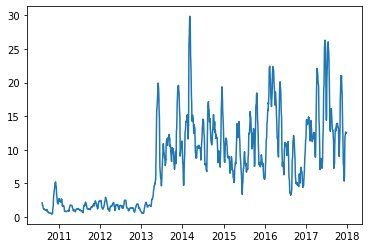

<Figure size 800x640 with 0 Axes>

In [33]:
STD = SMA_std(25)
plt.plot(STD)


In [322]:
##### Task 4


a = 25
b = 50
c = 25
SMA25 = SMA(a) 
SMA50 = SMA(b) 
STD25 = SMA_std(c)
SMA_difference = (tesla["SMA"+str(a)] - tesla["SMA"+str(b)]).abs()
tesla = tesla_data[["Close"]].copy()               
tesla["SMA"+str(a)] = SMA25 
tesla["SMA"+str(b)] = SMA50
tesla["STD"+str(c)] = STD25
tesla["SMA_dif"] = SMA_difference
tesla = tesla.loc[tesla.index >= "2017-01-01"]   

tesla


,Close,SMA25,SMA50,STD25,SMA_dif
Date,,,,,
2017-01-03,216.99,200.1476,196.2010,11.867083,3.9466
2017-01-04,226.99,201.3824,196.7390,12.984026,4.6434
2017-01-05,226.75,202.8696,197.2188,13.685038,5.6508
2017-01-06,229.01,204.4540,197.7522,14.337972,6.7018
2017-01-09,231.28,206.4300,198.3330,14.500421,8.0970
...,...,...,...,...,...
2017-12-22,325.20,320.8672,323.6766,12.576965,2.8094
2017-12-26,317.29,320.9568,322.9088,12.541725,1.9520
2017-12-27,311.64,321.0728,322.0302,12.436996,0.9574


In [325]:
##### The Strategy

### Buy signal will be generated if SMA25 is greater then SMA50, and sell vice versa.
### Hold the position if STD25 < SMA_50_25_difference

signal = (tesla["SMA"+str(b)]< tesla["SMA"+str(a)])
signal = signal.astype(int)
tesla["Signal"] = signal

hold = tesla["STD"+str(c)]< SMA_difference
tesla.loc[hold, "Signal"] = np.nan 
tesla = tesla.ffill(axis = 0) 
tesla["Signal"] = tesla["Signal"].diff()
tesla.head()

,Close,SMA25,SMA50,STD25,SMA_dif,Signal
Date,,,,,,
2017-01-03,216.99,200.1476,196.2010,11.867083,3.9466,NaN
2017-01-04,226.99,201.3824,196.7390,12.984026,4.6434,0.0
2017-01-05,226.75,202.8696,197.2188,13.685038,5.6508,0.0
2017-01-06,229.01,204.4540,197.7522,14.337972,6.7018,0.0
2017-01-09,231.28,206.4300,198.3330,14.500421,8.0970,0.0


In [326]:
### The first trade is generated 

tesla.iloc[0,-1] = (tesla.iloc[0]["SMA"+str(b)] < tesla.iloc[0]["SMA"+str(a)]).astype(int)
tesla.head()

,Close,SMA25,SMA50,STD25,SMA_dif,Signal
Date,,,,,,
2017-01-03,216.99,200.1476,196.2010,11.867083,3.9466,1.0
2017-01-04,226.99,201.3824,196.7390,12.984026,4.6434,0.0
2017-01-05,226.75,202.8696,197.2188,13.685038,5.6508,0.0
2017-01-06,229.01,204.4540,197.7522,14.337972,6.7018,0.0
2017-01-09,231.28,206.4300,198.3330,14.500421,8.0970,0.0


In [327]:
### Check the signals generated

position = tesla[tesla["Signal"] != 0].copy()
position.head()

,Close,SMA25,SMA50,STD25,SMA_dif,Signal
Date,,,,,,
2017-01-03,216.99,200.1476,196.2010,11.867083,3.9466,1.0
2017-03-27,270.22,255.4664,256.0652,8.893452,0.5988,-1.0
2017-04-04,303.70,261.5928,261.3486,16.079095,0.2442,1.0
2017-07-26,343.85,342.3632,342.4072,23.256689,0.0440,-1.0
2017-08-25,348.05,347.4628,346.6624,13.008663,0.8004,1.0


In [334]:
### Check the P&L of strategy

position["P&L"] = position["Close"].pct_change()
position.loc[position.Signal == 1, "P&L"] = np.nan
position.head()

,Close,SMA25,SMA50,STD25,SMA_dif,Signal,P&L
Date,,,,,,,
2017-01-03,216.99,200.1476,196.2010,11.867083,3.9466,1.0,NaN
2017-03-27,270.22,255.4664,256.0652,8.893452,0.5988,-1.0,0.245311
2017-04-04,303.70,261.5928,261.3486,16.079095,0.2442,1.0,NaN
2017-07-26,343.85,342.3632,342.4072,23.256689,0.0440,-1.0,0.132203
2017-08-25,348.05,347.4628,346.6624,13.008663,0.8004,1.0,NaN


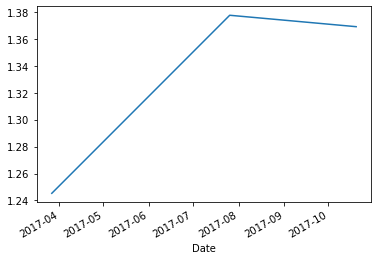

The % return of the strategy is :36.9


In [335]:
### Cumulative Return

(position["P&L"].dropna().cumsum()+1).plot()
plt.show()
return_of_strategy = np.sum(position["P&L"])
print("The % return of the strategy is :" +str(return_of_strategy.round(4)*100))

    

In [313]:
##### Task 5

only_buy = position[position["Signal"]==1].iloc[:,:-1]
bought_amount = len(only_buy)
bought_price = only_buy.Close.mean()
year_end = 311.35
PL_only_buy = (year_end/bought_price)-1
print("Mean of trades:" +str(bought_price))
print("Without selling, the return % of strategy will be:" +str(PL_only_buy))



Mean of trades:295.02250000000004
Without selling, the return % of strategy will be:0.05534323653280682


In [328]:
open_price = 216.99
close_price = 311.35
return_year = (open_price/close_price)+1
return_year

1.6969327123815643

In [329]:
### Comparison of All

print("Without selling, 1 TL becomes: "+str(PL_only_buy+1))
print("With buy and sell strategy, 1 TL becomes: "+str(return_of_strategy+1))
print("Buy first day - sell last day, 1 TL becomes: "+str(return_year))

Without selling, 1 TL becomes: 1.0553432365328068
With buy and sell strategy, 1 TL becomes: 1.3690378818517375
Buy first day - sell last day, 1 TL becomes: 1.6969327123815643


In [ ]:
### If 1 TL invested in the first day of the year, the return would be higher than the whole strategies.